In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Printing the columns of the dataset, as well as their types. This is an important step because depending of the type of 
data that we have, the treatment that we have to perform differs.

In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
data.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                     40.6475
longitude                                                   -73.9724
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [7]:
data.drop(columns=['id', 'name', 'host_id', 'host_name'], inplace=True)

Text(0.5, 0, 'neighbourhood group')

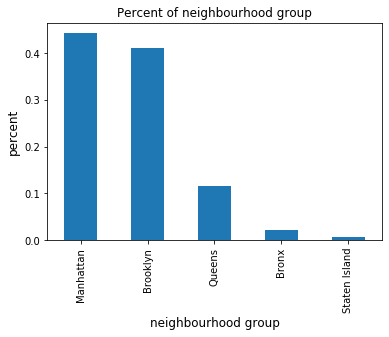

In [8]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = data.neighbourhood_group.value_counts()
(count_neigh/data.shape[0]).plot(kind='bar');
plt.title('Percent of neighbourhood group', fontsize = 12)
plt.ylabel('percent', fontsize = 12)
plt.xlabel('neighbourhood group', fontsize = 12)

In the listed neighborhood group the amount of business in Manhattan is largest and in Staten Island is the smallest. This is expected because in Manhattan and Brooklyn the amount of tourist is higher than the other because of their diiferent attarction of tourists in the area. 

Text(0, 0.5, 'the percent of every room type')

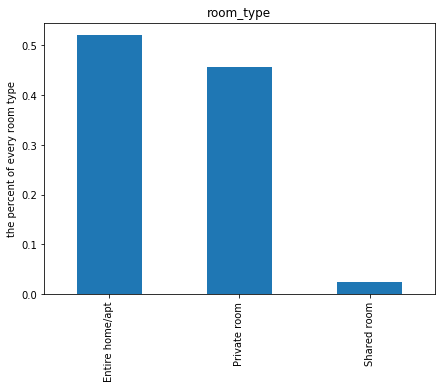

In [9]:
#visualize the categorical values for the room_type
plt.figure(figsize=(7,5))
count_room = data.room_type.value_counts()
(count_room/data.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

This variable is an indication of the human prefence with the nature of house and status of privacy. In all nighborhood the amount of people serving in home/apartment and private room is higher than shared room. Shared room business in this specific area is generally not significance. 

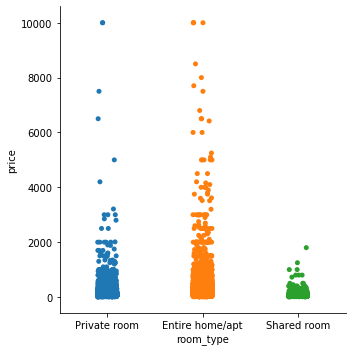

In [10]:
# reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

sns.catplot(x="room_type", y="price", data=data);

In [11]:
data.groupby('room_type')[['price','number_of_reviews']].mean()

,price,number_of_reviews
room_type,,
Entire home/apt,211.794246,22.842418
Private room,89.780973,24.112962
Shared room,70.127586,16.600000


The Entire rooms/apartments cost are more than just a shared room, where as the differece in price of a shared room and a private one is about 20 dollars. In contrast, the number of viewrs are higher in private room than the other. This small price differece between private room and shared room may lead to prefer the private room. 


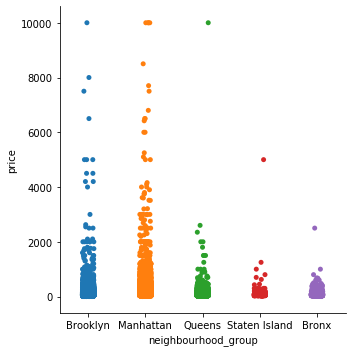

In [12]:
sns.catplot(x="neighbourhood_group", y="price", data=data);

In [13]:
def plot_price_wrt_room_type(data,title):
    data2 = data.pivot(columns='room_type',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])

    plt.figure(figsize=(8, 6))
    plt.rc('legend',**{'fontsize':12})
    plt.legend(fontsize=15)
    plt.rcParams['figure.figsize']=(15,8)
    plt.style.use(style='ggplot')
    plt.tick_params(labelsize=12)
    plt.tick_params(labelsize=12)
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 10}) 
    n_bins=12
    colors = ['orange', 'aqua', 'green']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2]]
    plt.hist([x1, x2, x3], n_bins, histtype='bar', 
             color=colors, range=[0,300],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


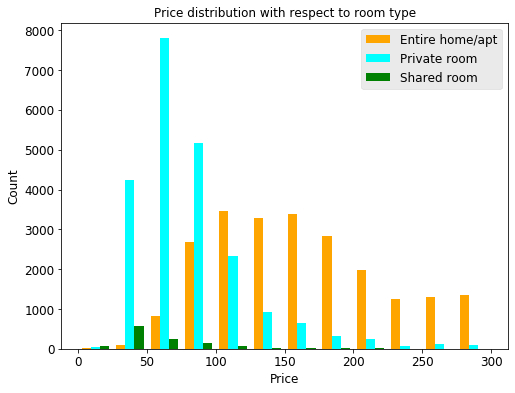

In [14]:
title='Price distribution with respect to room type'
plot_price_wrt_room_type(data,title)

In [15]:
def plot_price_wrt_neigbourhood_group(data,title):
    data2 = data.pivot(columns='neighbourhood_group',values='price')
    x1=list(data2[data2.columns[0]])
    x2=list(data2[data2.columns[1]])
    x3=list(data2[data2.columns[2]])
    x4=list(data2[data2.columns[3]])
    x5=list(data2[data2.columns[4]])

    plt.figure(figsize=(9, 7))
    plt.style.use(style='ggplot')
    plt.rc('legend',**{'fontsize':12})
    plt.tick_params(labelsize=25) 
    plt.legend(fontsize=20)
    plt.rcParams['figure.figsize']=(15,8)       
    plt.ylabel("Count",fontsize=12,color='black')
    plt.xlabel("Price",fontsize=12,color='black')
    plt.title(title,fontsize=12,color='black')
    plt.legend(prop={'size': 8}) 
    plt.tick_params(labelsize=12)
    n_bins=12
    colors = ['yellow', 'red', 'green', 'black', 'blue']
    labels=[data2.columns[0],data2.columns[1],data2.columns[2], data2.columns[3], data2.columns[4]]
    plt.hist([x1, x2, x3, x4, x5], n_bins, histtype='bar', 
             color=colors, range=[0,400],label=labels,alpha=1)
         
    plt.legend(loc="upper right")
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


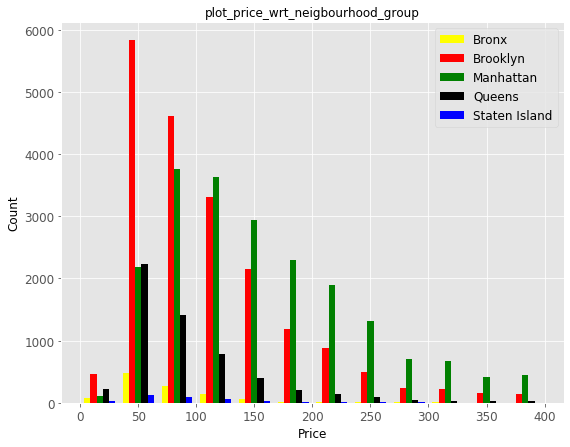

In [16]:
title='plot_price_wrt_neigbourhood_group'
plot_price_wrt_neigbourhood_group(data,title)

In [17]:
#plt.subplot2grid((2,3), (0,0))
#data.room_type[data.neighbourhood_group == "..... "].value_counts(normalize = True).plot(kind = "bar", alpha= 0.5)
#plt.title("room_type with neigbourhood_group")

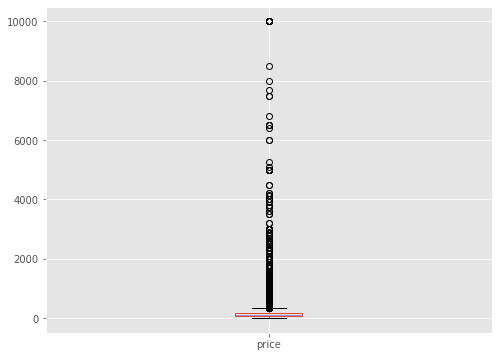

In [18]:
plt.figure(figsize=(8,6))
data.boxplot(column='price', return_type='axes')  
plt.show()

To see the average value and how it devate from the    -----

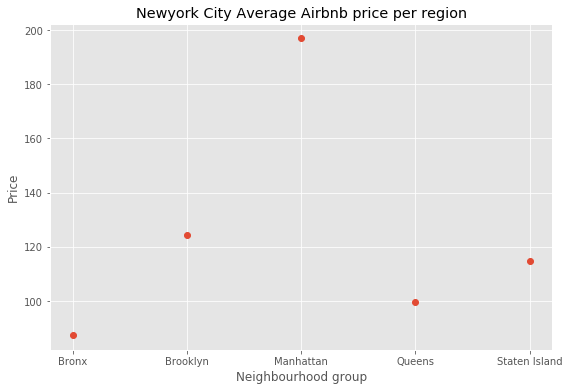

In [19]:
plt.figure(figsize = (9, 6))
plt.plot(data.groupby(['neighbourhood_group'])['price'].mean().keys(),data.groupby(['neighbourhood_group'])['price'].mean().values,'o')
plt.title('Newyork City Average Airbnb price per region')
plt.ylabel('Price')
plt.xlabel('Neighbourhood group')
color = ['DarkBlue']
plt.show()


As we see that the average price in Manhattan is higher than in other regions. Manhattan is the most populated of Newyork City. it is among the world's major commerical, financial and cultural ceters. because of this the area has high tourists. 

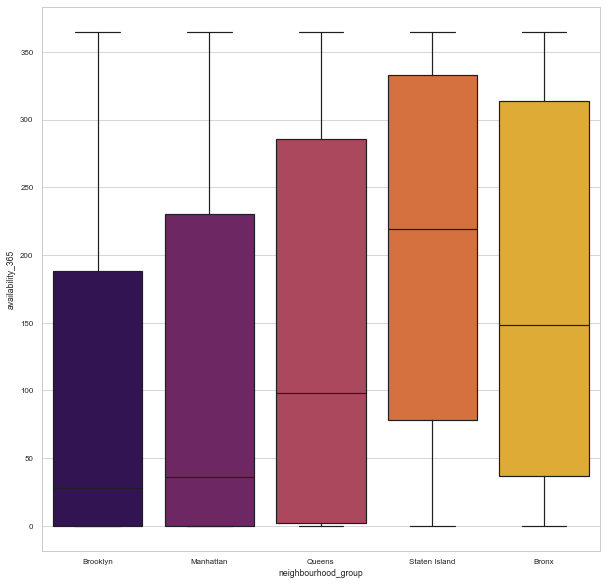

In [20]:
#boxplot neighbourhood_group and room availability
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
plt.figure(figsize=(10,10))                                                           
plt.tight_layout()                                                                    
                                               
sns.despine(left=True, bottom=True)                                                   
plt.savefig('test.pdf', bbox_inches='tight') 
df1 = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='inferno')



### Regions colored by price

In [21]:
# reference: https://plot.ly/python/line-and-scatter/
regions_dict = {value: i for i,value in enumerate(data.neighbourhood_group.unique())}
reverse_regions_dict = {i:v for v,i in regions_dict.items()}
data = data.applymap(lambda s: regions_dict.get(s) if s in regions_dict.keys() else s)

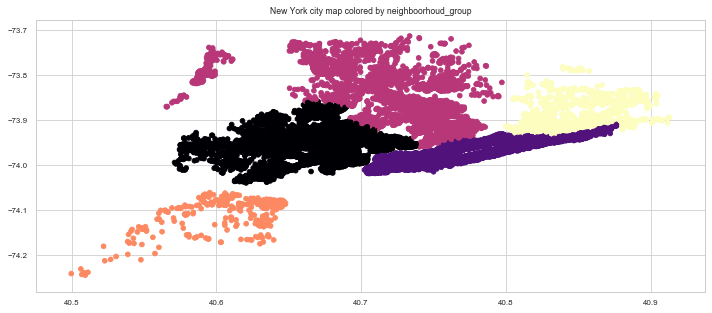

In [22]:
plt.figure(figsize=(12, 5))
plt.scatter(data.latitude,data.longitude, c = data.neighbourhood_group,cmap='magma')
plt.title('New York city map colored by neighboorhoud_group')
plt.show()

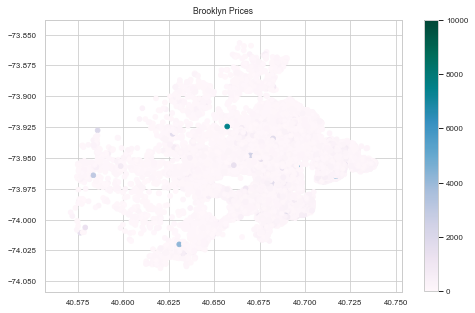

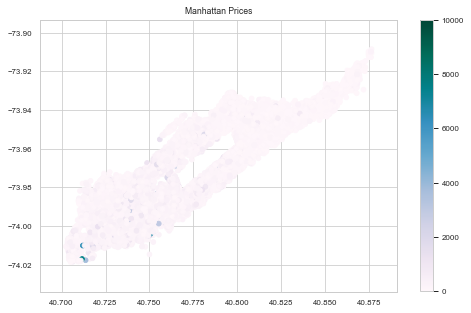

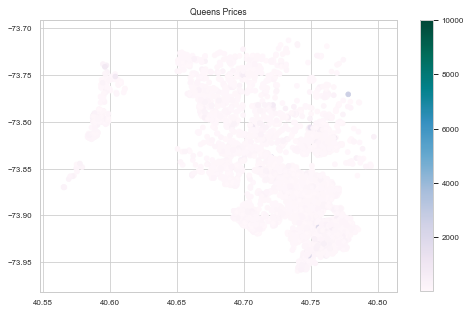

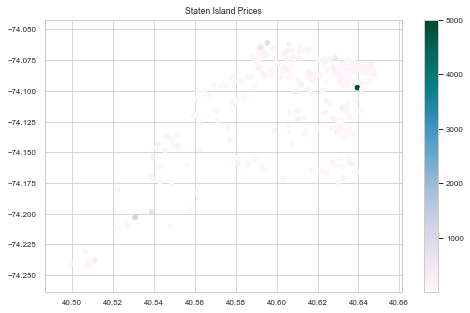

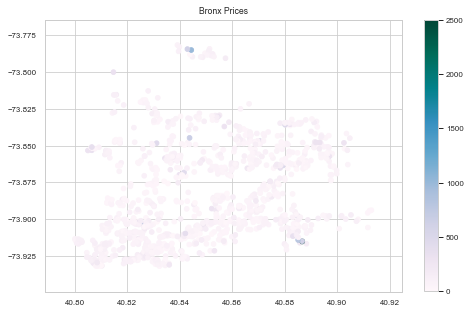

In [28]:
for i,region in enumerate(data.groupby(['neighbourhood_group'])['price'].mean().keys()):
    NY_data  = data[data.neighbourhood_group == region]
    plt.figure(figsize=(8, 5))
    # xxx, sub = plt.subplots(1, 2)
    plt.scatter(NY_data.latitude, NY_data.longitude, c = NY_data.price,cmap='PuBuGn')
    plt.title('{} Prices'.format(reverse_regions_dict[region]))
    plt.colorbar()
    plt.show()

When we look at the amount of owners per region, it is interesting to notice that in the regions where the rent price is
higher, the number of owners is also higher. That is probably due to the fact that as the apartments cost more in such regions
is harder to find owners of two or more houses there.

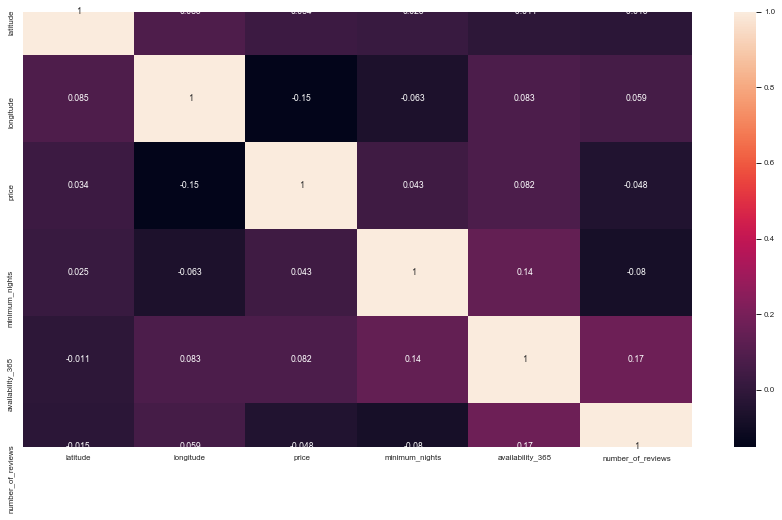

In [24]:
sns.heatmap(data[['latitude','longitude','price','minimum_nights','availability_365','number_of_reviews']].corr(),annot=True)
plt.show()

As seen in the correlation matrix, homes that are more available tend to have more reviews, which is natural,
since as the place is avaliable more days in a year more people can rent it.

In [25]:
def plot_price_group(data):
    '''
    This function for plotting the price distribution for every neighbourhood group
    
    input -> the dataframe
    output -> plotting the price distribution on average for every  neighbourhood group based on the neighbourhoods
    '''
    neigh_list = data['neighbourhood_group'].unique().tolist()
    fig,axs = plt.subplots(5,1,figsize=(20,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for group in neigh_list:
        data_price = data[data.neighbourhood_group==group][["neighbourhood","price"]]
        data_price = data_price.groupby("neighbourhood").mean()
        sns.distplot(data_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(group))
        axs[i].set_title('the price distribution in {}'.format(group))
        i += 1

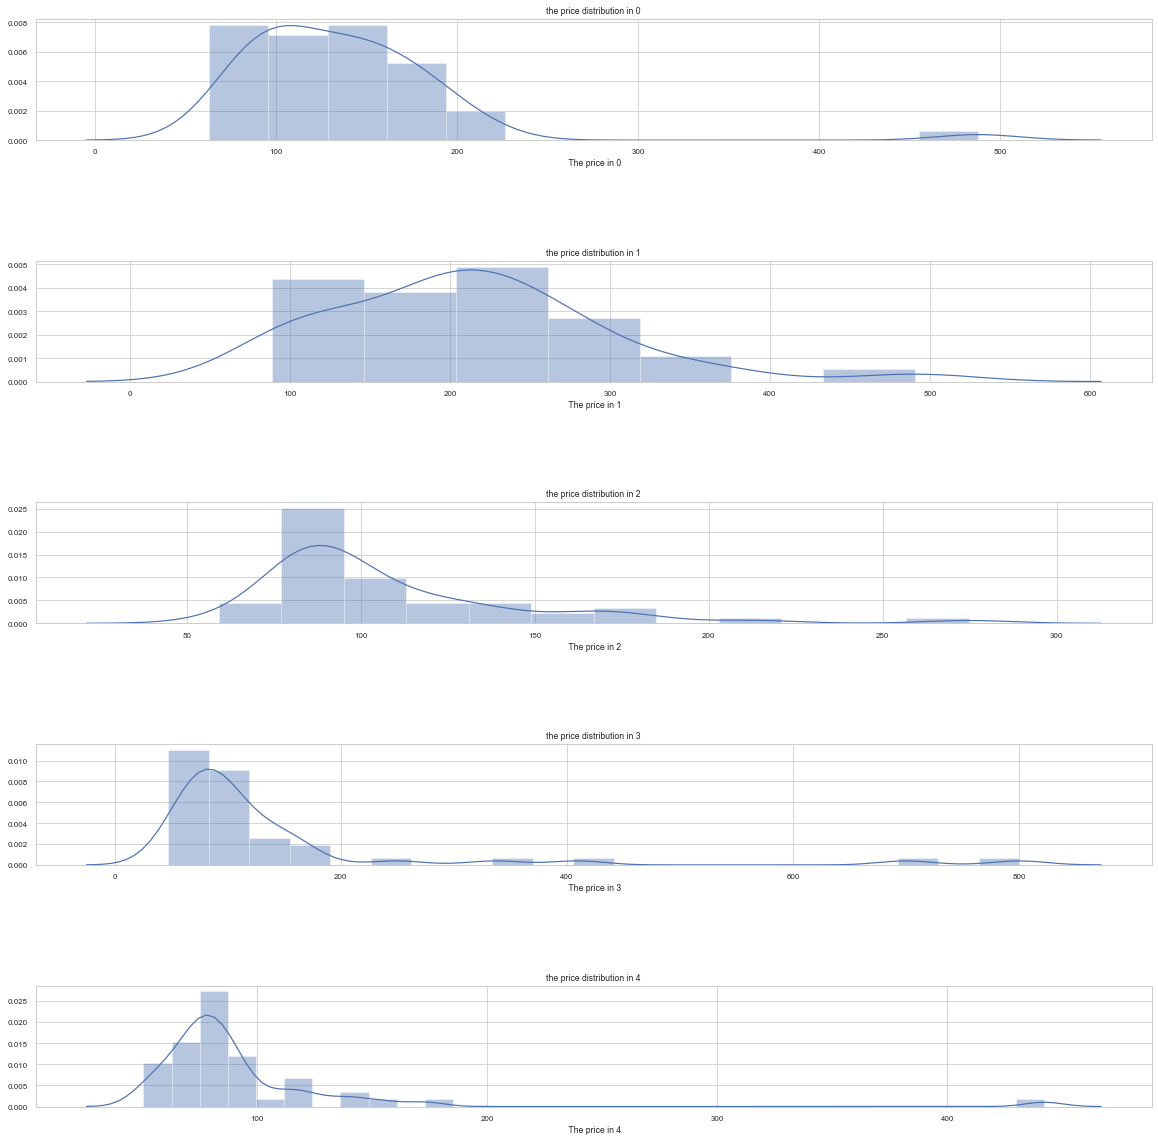

In [26]:
plot_price_group(data)